In [5]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import sympy as sp

# Level 1: Foundation-Understanding the Free Energy Landscape

## Visualizing the freen energy density of a superconductor in the absence of a magnetic field

The free energy density in the absence of a magnetic field is given by:
\begin{equation}
f_{\mathrm{GL}}
=
\alpha(T) |\psi|^2
+\frac{\beta}{2}|\psi|^4
\end{equation}
The value of ${\alpha}$ depends on temperature on the following way:
\begin{equation}
\alpha(T) = \alpha_0(T-T_c)
\end{equation}
and the value of ${\beta}$ can be assumed to be constant near the ${T_c}$.


In [2]:
def f_GL(alpha_0, beta, T, T_c):
  alpha = alpha_0*(T-T_c)
  psi_abs = np.linspace(-1,1,1000)
  f = alpha * psi_abs**2 + (beta/2) * psi_abs**4
  plt.figure(figsize=(5,4))
  plt.plot(psi_abs,f, label=fr"$\alpha=\alpha_0(T-T_c)={alpha:.3g}$" )
  plt.xlabel(r"order parameter $|\psi|$")
  plt.ylabel(r"$f_GL(\psi,T)$")
  plt.title("Free energy density for superconductor in the absence of a magnetic field")
  plt.legend()
  plt.grid(True)
  plt.show()

interact(
    f_GL,
    alpha_0=FloatSlider(min=0, max=1, step=0.1, value=1.0),
    beta=FloatSlider(min=0, max=1, step=0.1, value=1.0),
    psi_abs = FloatSlider(min=0, max=1, step=0.1, value=1.0),
    T_c = FloatSlider(min=0, max=1, step=0.1, value=1.0),
    T = FloatSlider(min=0, max=1, step=0.1, value=1.0)

)


interactive(children=(FloatSlider(value=1.0, description='alpha_0', max=1.0), FloatSlider(value=1.0, descripti…

<function __main__.f_GL(alpha_0, beta, T, T_c)>

As can be seen from the plot above, for negative values of $\alpha$, i.e. when the temperature falls below the critical temperature, the free energy density aquires negative minima which are degenerate.

# Temperature dependence of order parameter

If we minimize the free energy density ($\frac{\partial F}{\partial |\psi|}=0$), we obtain the following equation for the order parameter:
\begin{equation}
2\alpha\|\psi| + 2\beta|\psi|^3 = 0
\end{equation}
The possible solutions are(taking into account that  $|\psi|$ is a magnitude so it can't be negative):
\begin{equation}
|\psi| =
\begin{cases}
0, & \dfrac{T}{T_c} \ge 1,\\[8pt]
\sqrt{\dfrac{\alpha_0 T_c}{\beta}\left(1-\dfrac{T}{T_c}\right)},
& \dfrac{T}{T_c}<1.
\end{cases}
\end{equation}

/tmp/ipython-input-2870449423.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.where(t < 1, np.sqrt((alpha0/beta)*T_c*(1-t)), 0.0) #np.where(condition, value_if_true, value_if_false)


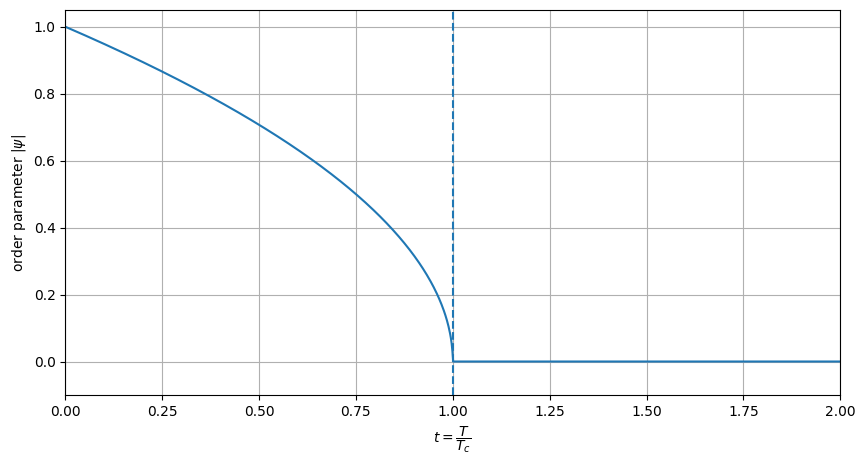

In [42]:
T_c = 1
t = np.linspace(0,2*T_c,1000) #t = T/T_c
alpha0 = 1
beta = 1
def psi_abs(alpha0,beta,t,T_c):
  return np.where(t < 1, np.sqrt((alpha0/beta)*T_c*(1-t)), 0.0) #np.where(condition, value_if_true, value_if_false)

plt.figure(figsize=(10,5))
plt.plot(t,psi_abs(alpha0,beta,t, T_c))
plt.xlabel(r'$t =\dfrac{T}{T_c}$ ')
plt.ylabel(r"order parameter $|\psi|$")
plt.axvline(1.0, linestyle="--")
plt.xlim(0,2)
plt.ylim(bottom = -0.1)
plt.grid(True)

We can see that the value of the order parameter reaches a maximum at 0 temperature and becomes zero once the temperature is equal to the critical temperature or above.